# Crime Analytics: Visualization of Incident Reports
In this assignment, I will analyze criminal incident data from Seattle or San Francisco to visualize patterns.

## Import libraries 

In [2]:
import pandas as pd                 # data manipulation
import numpy as np                  # for matrix and vector calculus
import matplotlib.pyplot as plt     # for visualisation
import seaborn as sns               # for visualisation
%matplotlib inline                  

## Load data

In [4]:
sanDF = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')
seatDF = pd.read_csv('seattle_incidents_summer_2014.csv')

/home/hung/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### First insight look

In [5]:
sanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


In [6]:
sanDF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [7]:
seatDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32779 entries, 0 to 32778
Data columns (total 19 columns):
RMS CDW ID                           32779 non-null int64
General Offense Number               32779 non-null int64
Offense Code                         32779 non-null object
Offense Code Extension               32779 non-null int64
Offense Type                         32779 non-null object
Summary Offense Code                 32779 non-null object
Summarized Offense Description       32779 non-null object
Date Reported                        32779 non-null object
Occurred Date or Date Range Start    32779 non-null object
Occurred Date Range End              16499 non-null object
Hundred Block Location               32779 non-null object
District/Sector                      32722 non-null object
Zone/Beat                            32723 non-null object
Census Tract 2000                    32645 non-null float64
Longitude                            32779 non-null float64
Latitud

In [8]:
seatDF.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


Both datasets have several common columns: incident id, type/category, description, date-time occuring, address, latitude, longitude.

https://github.com/catwang89/DataScience-at-scale/blob/master/3.Communication_DataScience_results/Crime-Analytics.ipynb
https://github.com/FCH808/Data_Science_at_Scale_Specialization/blob/master/Course_3_assignments/In_Seattle%2C_Burglars%2C_Cops%2C_Or_Both_Take_a_Lunch_Break_Before_Getting_Back_to_Business_During_the_Work_Week.ipynb    

### Reload and parse date, time

In [31]:
sanDF = pd.read_csv('sanfrancisco_incidents_summer_2014.csv',
                    parse_dates=['Date', 'Time'],
                    infer_datetime_format=True)

seatDF = pd.read_csv('seattle_incidents_summer_2014.csv', 
                     parse_dates=['Date Reported', 
                                  'Occurred Date or Date Range Start',
                                  'Occurred Date Range End'],
                    infer_datetime_format=True)

### Test if any record outside of summer 2014

In [32]:
print("Sanfrancisco, earliest day:", sanDF.Date.min())
print("Sanfrancisco, latest day:", sanDF.Date.max())
print("Seattle, earliest day:", seatDF['Occurred Date or Date Range Start'].min())
print("Seattle, latest day:", seatDF['Occurred Date or Date Range Start'].max())

Sanfrancisco, earliest day: 2014-06-01 00:00:00
Sanfrancisco, latest day: 2014-08-31 00:00:00
Seattle, earliest day: 2014-06-01 00:00:00
Seattle, latest day: 2014-08-31 23:50:00


As we can see, all incidents occured in summer 2014, though they could be repoted later.

## Data analytics and visualization
### Overall numbers by category
Check if categories are the same for the two cities:

In [37]:
print("Sanfransico incident categories:\n", sanDF.Category.unique(),"\n", "="*80)
print("Seattle incident types:\n", seatDF['Offense Type'].unique())

Sanfransico incident categories:
 ['ARSON' 'NON-CRIMINAL' 'LARCENY/THEFT' 'DRUG/NARCOTIC'
 'DRIVING UNDER THE INFLUENCE' 'OTHER OFFENSES' 'TRESPASS' 'VEHICLE THEFT'
 'ASSAULT' 'FRAUD' 'SUSPICIOUS OCC' 'SECONDARY CODES' 'WEAPON LAWS'
 'MISSING PERSON' 'WARRANTS' 'ROBBERY' 'DRUNKENNESS' 'PROSTITUTION'
 'LIQUOR LAWS' 'KIDNAPPING' 'FAMILY OFFENSES' 'LOITERING'
 'DISORDERLY CONDUCT' 'FORGERY/COUNTERFEITING' 'EMBEZZLEMENT' 'BURGLARY'
 'SUICIDE' 'VANDALISM' 'STOLEN PROPERTY' 'RUNAWAY' 'GAMBLING' 'EXTORTION'
 'PORNOGRAPHY/OBSCENE MAT' 'BRIBERY'] 
Seattle incident types:
 ['BURGLARY-FORCE-RES' 'FRAUD-IDENTITY THEFT' 'THEFT-MAIL' 'COUNTERFEIT'
 'THEFT-OTH' 'THEFT-BUILDING' 'FRAUD-CREDIT CARD' 'FRAUD-CHECK' 'EMBEZZLE'
 'BURGLARY-NOFORCE-NONRES' 'FRAUD-OTHER' 'THEFT-CARPROWL' 'HARASSMENT'
 'THEFT-AUTOACC' 'BURGLARY-NOFORCE-RES' 'PROPERTY DAMAGE-NON RESIDENTIA'
 'THEFT-LICENSE PLATE' 'PROPERTY LOST' 'FORGERY-CHECK' 'VEH-THEFT-AUTO'
 'BURGLARY-SECURE PARKING-RES' 'THEFT-PKPOCKET' 'THREATS-OTHER'
 'P

The categories are not the same. We can map incident types of Seattle and Sanfransico categories to the same smaller set. Sanfrancisco has incidents with category "NON-CRIMINAL", but Seattle does not.<br>
Source for mapping: http://www.legalmatch.com/law-library/article/what-are-the-different-types-of-crimes.html

In [38]:
map_categories = {
'[INC - CASE DC USE ONLY]': 'OTHER OFFENSES',
'ANIMAL COMPLAINT': 'OTHER OFFENSES',
'ARSON': 'PROPERTY',
'ASSAULT': 'PERSONAL',
'BIAS INCIDENT': 'INCHOATE',
'BIKE THEFT': 'PROPERTY',
'BRIBERY': 'PROPERTY',
'BURGLARY': 'PROPERTY',
'BURGLARY-SECURE PARKING-RES': 'PROPERTY',
'CAR PROWL': 'INCHOATE',
'COUNTERFEIT': 'PROPERTY',
'DISORDERLY CONDUCT': 'INCHOATE',
'DISPUTE': 'INCHOATE',
'DISTURBANCE': 'INCHOATE',
'DRIVING UNDER THE INFLUENCE': 'STATUTORY',
'DRUG/NARCOTIC': 'STATUTORY',
'DRUNKENNESS': 'STATUTORY',
'DUI': 'STATUTORY',
'ELUDING': 'INCHOATE',
'EMBEZZLE': 'PROPERTY',
'EMBEZZLEMENT': 'PROPERTY',
'ESCAPE': 'STATUTORY',
'EXTORTION': 'INCHOATE',
'FALSE REPORT': 'INCHOATE',
'FAMILY OFFENSES': 'INCHOATE',
'FIREWORK': 'PROPERTY',
'FORGERY': 'PROPERTY',
'FORGERY/COUNTERFEITING': 'PROPERTY',
'FRAUD': 'PROPERTY',
'GAMBLING': 'PROPERTY',
'HOMICIDE': 'PERSONAL',
'ILLEGAL DUMPING': 'STATUTORY',
'INJURY': 'PERSONAL',
'KIDNAPPING': 'PERSONAL',
'LARCENY/THEFT': 'PROPERTY',
'LIQUOR LAWS': 'STATUTORY',
'LIQUOR VIOLATION': 'STATUTORY',
'LOITERING': 'INCHOATE',
'LOST PROPERTY': 'PROPERTY',
'MAIL THEFT': 'PROPERTY',
'MISSING PERSON': 'PERSONAL',
'NARCOTICS': 'STATUTORY',
'NON-CRIMINAL': 'NON-CRIMINAL',
'OBSTRUCT': 'PROPERTY',
'OTHER OFFENSES': 'OTHER OFFENSES',
'OTHER PROPERTY': 'PROPERTY',
'PICKPOCKET': 'PROPERTY',
'PORNOGRAPHY': 'INCHOATE',
'PORNOGRAPHY/OBSCENE MAT': 'INCHOATE',
'PROPERTY DAMAGE': 'PROPERTY',
'PROSTITUTION': 'INCHOATE',
'PUBLIC NUISANCE': 'INCHOATE',
'PURSE SNATCH': 'PROPERTY',
'RECKLESS BURNING': 'PROPERTY',
'RECOVERED PROPERTY': 'PROPERTY',
'ROBBERY': 'PROPERTY',
'RUNAWAY': 'INCHOATE',
'SECONDARY CODES': 'STATUTORY',
'SHOPLIFTING': 'PROPERTY',
'STOLEN PROPERTY': 'PROPERTY',
'SUICIDE': 'PERSONAL',
'SUSPICIOUS OCC': 'PROPERTY',
'THEFT OF SERVICES': 'PROPERTY',
'THREATS': 'INCHOATE',
'TRAFFIC': 'STATUTORY',
'TRESPASS': 'INCHOATE',
'VANDALISM': 'PROPERTY',
'VEHICLE THEFT': 'PROPERTY',
'VIOLATION OF COURT ORDER': 'STATUTORY',
'WARRANT ARREST': 'STATUTORY',
'WARRANTS': 'STATUTORY',
'WEAPON': 'STATUTORY',
'WEAPON LAWS': 'STATUTORY'
}

In [59]:
# map to smaller category set
seatDF['Incident Category'] = seatDF['Summarized Offense Description']\
                                    .apply(lambda col: map_categories[col])
sanDF['Incident Category'] = sanDF['Category']\
                                  .apply(lambda col: map_categories[col])

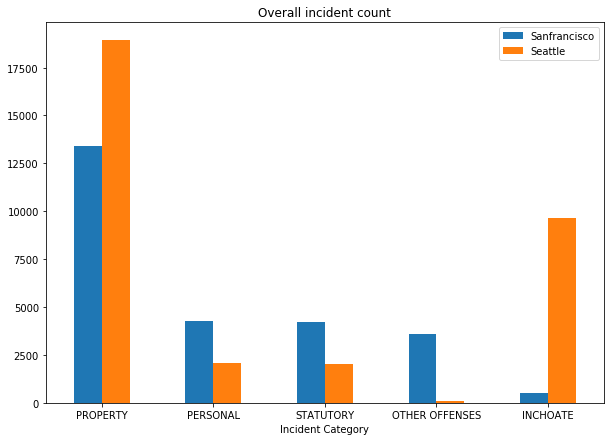

In [82]:
# Merge for grpah, ignore NON-CRIMINAL category
catDF = sanDF['Incident Category'].value_counts().reset_index()\
        .rename(columns={'Incident Category':'Sanfrancisco','index':'Incident Category'})\
        .merge(seatDF['Incident Category'].value_counts().reset_index()
                    .rename(columns={'Incident Category':'Seattle','index':'Incident Category'}),
              on='Incident Category')\
        .set_index('Incident Category') 

# Visulization
catDF.plot.bar(rot=0, title='Overall incident count',figsize=(10,7))

We can see that there more incidents in Seattle than in Sanfrancisco. In both cities, most of incidents (~50%) are related to "PROPERTY". Incident, related to "PERSONAL", "STATUTORY" and "OTHER OFFENSES" in Sanfrancisco are more than in Seattle, while "PROPERTY" and "INCHOATE" has opposite trend.

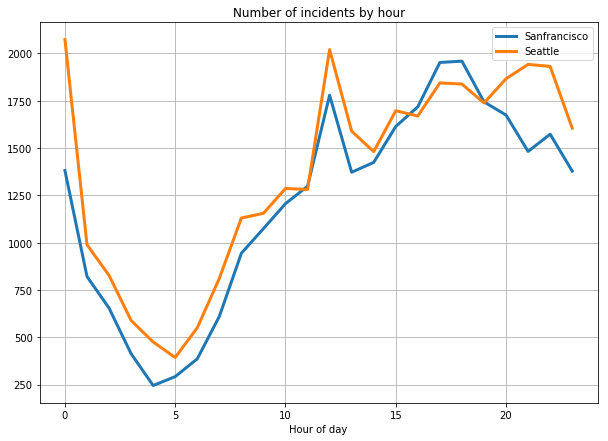

In [142]:
hourDF = sanDF.Time.apply(lambda x: x.hour).value_counts().reset_index()
hourDF = hourDF.sort_values('index').rename(columns={'index':'Hour of day', 'Time':'Sanfrancisco'})
hourDF2 = seatDF['Occurred Date or Date Range Start'].apply(lambda x: x.hour).value_counts().reset_index()
hourDF2 = hourDF2.sort_values('index').rename(columns={'index':'Hour of day', 'Occurred Date or Date Range Start':'Seattle'})
hourDF = hourDF.merge(hourDF2, on='Hour of day').set_index('Hour of day')
hourDF.plot.line(figsize=(10,7),title="Number of incidents by hour",grid=True, linewidth=3)

As we can see that the number of incidents in both cities are less in the morning (2.am-7.am) and high in other moments of the day. In Seattle, the number of incidents are high in midday, midnight and in the late evening (9.pm-10.pm) while in Sanfrancisco, the maximum number is in the late afaternoon (6.pm).

In [151]:
day_names = {0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',
             4:'Friday', 5:'Saturday', 6:'Sunday'}
ss = sanDF.Date.apply(lambda x: x.weekday()).value_counts().reset_index()
ss['index'] = ss['index'].map(day_names)

In [152]:
ss

,index,Date
0,Friday,4451
1,Saturday,4319
2,Sunday,4218
3,Wednesday,4102
4,Monday,4005
5,Thursday,3968
6,Tuesday,3930
